<a href="https://colab.research.google.com/github/venussar/Numerical-Representation-Errors-and-Stability/blob/main/TALLER_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/danielruizm16/ComputationalMethods/blob/main/Numerical_Rep_Errors/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 02: Numerical Representation, Errors and Stability..

---
### Teacher: Daniel Ruiz Mejía
### Name: CAROLINA ANDREA RODAS CASTAÑEDA
*Computational Methods 2025-II*

---

# 1.

Create a function called `myint` that from a binary number with a 16-bit base finds the corresponding integer. Compare your result with `int(0b1000011100001)`

In [ ]:
def myint(x):
    suma = 0
    potencia = len(x) - 1

    for i in x:   # recorre cada dígito
        suma += int(i) * 2**potencia
        potencia -= 1  # vamos bajando la potencia en cada paso

    return suma

In [ ]:
myint("1000011100001") # POR FAVOR INGRESAR EL BINARIO SIN EL OB

4321

In [ ]:
int(0b1000011100001)

4321

# 2. Approximation of $\pi$
The Maclaurin series for the inverse tangent function converges for $-1 < x \leq 1$ and is given by:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Basic approximation**
    - Using the fact that $\tan(\pi/4) = 1$, implement a Python function that calculates $4P_n(1)$ and determine the minimum number of terms $n$ needed so that $|4P_n(1) - \pi| < 10^{-3}$. Compare your result with the $\pi$ value from the numpy library.
    - Requiring that the $\pi$ value is within an error of $10^{-4}$. How many terms of the series would need to be added to achieve this precision? Implement a Python solution to find this value.

- **Convergence improvement**
    The previous method can be significantly improved using the identity:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implement a Python function that evaluates the series for $\arctan(1/2)$ and $\arctan(1/3)$ separately and then sums them. Determine the minimum number of terms needed for each series (they can be different) to approximate $\pi$ with an error less than $10^{-3}$ and $10^{-6}$.

- **High-precision method**
    To obtain even faster convergence, use the identity:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    - The minimum number of terms needed in each series to approximate $\pi$ with error less than $10^{-3}$ and $10^{-6}$.
    - Compare the performance (number of terms required) with the previous methods.



In [ ]:

# Funcion
def arctan_1(n):
    resultado = 0
    for i in range(1, n + 1):
        termino = ((-1) ** (i + 1)) / (2 * i - 1)
        resultado += termino
    return resultado

# Funcion 2
def aproximar_pi(n):
    return 4 * arctan_1(n)

# Funcion que busca el numero minimo de terminos
def encontrar_n_minimo(tolerancia):
    pi_real = np.pi  # Valor real de pi
    n = 1
    while True:
        pi_aprox = aproximar_pi(n)
        error = abs(pi_aprox - pi_real)
        if error < tolerancia:
            return n, pi_aprox, error
        n += 1


In [ ]:
# Probar con tolerancias 1e-3 y 1e-4
for tol in [1e-3, 1e-4]:
    n_terminos, pi_aprox, error = encontrar_n_minimo(tol)
    print(f"Terminos necesarios: {n_terminos}")
    print(f"Aproximacion de pi: {pi_aprox}")
    print(f"Error: {error}")
    print("-" * 30)


Terminos necesarios: 1000
Aproximacion de pi: 3.140592653839794
Error: 0.000999999749998981
------------------------------
Terminos necesarios: 10000
Aproximacion de pi: 3.1414926535900345
Error: 9.99999997586265e-05
------------------------------


La serie converge muy lento, o sea, necesita muchos términos para acercarse a PI

OTRA FORMA

In [ ]:
def arctan(x, n):
    suma = 0
    for i in range(n):
        termino = ((-1) ** i) * (x ** (2 * i + 1)) / (2 * i + 1)
        suma += termino
    return suma

# Valor real de pi
pi_real = np.pi

# Elegimos una tolerancia
tolerancia = 1e-3
for n in range(1, 1000):
    arctan_1_2 = arctan(1/2, n)
    arctan_1_3 = arctan(1/3, n)
    pi_aprox = 4 * (arctan_1_2 + arctan_1_3)
    error = abs(pi_aprox - pi_real)

    if error < tolerancia:
        print("Terminos usados en cada serie:", n)
        print("Aproximacion de pi:", pi_aprox)
        print("Error:", error)
        break


Terminos usados en cada serie: 4
Aproximacion de pi: 3.1408505617610554
Error: 0.0007420918287377454


Con solo 4 tErminos en cada serie ya conseguimos un error menor a 0.001 (el primer método necesito 1000 términos).

La aproximación de pi es buena pero no del todo: 3.14085

In [ ]:

def arctan(x, n):
    suma = 0
    for i in range(n):
        termino = ((-1) ** i) * (x ** (2 * i + 1)) / (2 * i + 1)
        suma += termino
    return suma

# Valor real de pi
pi_real = np.pi
tolerancia = 1e-6

for n in range(1, 1000):
    a = arctan(1/5, n)
    b = arctan(1/239, n)
    pi_aprox = 4 * (4 * a - b)
    error = abs(pi_aprox - pi_real)

    if error < tolerancia:
        print("Terminos usados en cada serie:", n)
        print("Aproximacion de pi:", pi_aprox)
        print("Error:", error)
        break

Terminos usados en cada serie: 4
Aproximacion de pi: 3.1415917721821773
Error: 8.814076157825923e-07


Con solo 4 términos en cada serie se logra un error menor a 1e-6, o sea, una aproximación super precisa.
La aproximación obtenida es 3.14159177, que es casi igual a pi (3.14159265). este metodo converge muy rápido y necesita muy pocos términos para mucha precision

En comparación con los otros metodos, es el mss eficiente y rápido para calcular pi con buena exactitud.

# 3. Exponential Series
Consider the series for $e^{-x}$
$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$
- Calculate the series for $x \leq 1$ and compare it with the function np.exp(-x) (assume the exponential from numpy is exact function is exact). Choose an $N$ for which the next term in the series is no more than $10^{-7}$ of the sum up to that point.
$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$
- Examine the terms of the series for $x \approx 10$ and observe the significant subtractive cancellations that occur when large terms are added to give small answers. In particular, print the near-perfect cancellation at $n \approx x - 1$.
- Check if better precision is obtained by being clever and using $e^{-x} = \frac{1}{e^x}$ for large values of $x$. This eliminates subtractive cancellation but does not eliminate all rounding errors.
- Progressively increasing $x$ from 1 to 10, and then from 10 to 100, use the program to experimentally determine when the series begins to lose precision, and when the series no longer converges.
- Create a series of plots of error versus $N$ for different values of $x$.


In [ ]:
import math
import numpy as np

def exp(x):
    suma = 0.0
    i = 0

    while True: #bucle infinito
        termino = ((-1)**i) * (x**i) / math.factorial(i)
        suma += termino

        siguiente = ((-1)**(i+1)) * (x**(i+1)) / math.factorial(i+1) # calcular el siguiente termino

        if abs(siguiente) <= 1e-7 * abs(suma):  # condicion de parada
            break

        i += 1


    real = np.exp(-x)    # valor exacto

    error_abs = abs(suma - real)      # errores
    error_rel = error_abs / abs(real)

    return print("la suma con la serie es:", suma,
                 "la suma real es: ", real,
                 "el error absoluto es: ", error_abs,
                 "el error relativo es: ",error_rel,
                 "el numero de iteraciones fueron :", i)


In [ ]:
exp(10)

la suma con la serie es: 4.539992793609265e-05 la suma real es:  4.5399929762484854e-05 el error absoluto es:  1.8263922072305795e-12 el error relativo es:  4.0228965480465895e-08 el numero de iteraciones fueron : 45


Si vamos cambiando los valores de exp, podemos ver que entre menor sea el x mas rapido converge, en 1.0 que es la valor mayor converge con n=10 y en 0.1 con n=4

In [ ]:

x = 10
N = 20  # cantidad de términos a mostrar
for n in range(N+1):
    termino = ((-1)**n) * (x**n) / math.factorial(n)
    print( n, termino, abs(termino))

0 1.0 1.0
1 -10.0 10.0
2 50.0 50.0
3 -166.66666666666666 166.66666666666666
4 416.6666666666667 416.6666666666667
5 -833.3333333333334 833.3333333333334
6 1388.888888888889 1388.888888888889
7 -1984.126984126984 1984.126984126984
8 2480.15873015873 2480.15873015873
9 -2755.731922398589 2755.731922398589
10 2755.731922398589 2755.731922398589
11 -2505.210838544172 2505.210838544172
12 2087.67569878681 2087.67569878681
13 -1605.9043836821616 1605.9043836821616
14 1147.0745597729724 1147.0745597729724
15 -764.7163731819817 764.7163731819817
16 477.9477332387385 477.9477332387385
17 -281.14572543455205 281.14572543455205
18 156.19206968586226 156.19206968586226
19 -82.2063524662433 82.2063524662433
20 41.10317623312165 41.10317623312165


para x grandes como 10 la serie primero crece mucho antes de decrecer:

In [ ]:


def inverso(x, tol=1e-7):

    suma = 0.0
    i = 0
    while True:
        termino = (x**i) / math.factorial(i)
        suma += termino

        if abs(termino) < tol * abs(suma):    # condición de parada
            break
        i += 1
    return 1/suma


In [ ]:
inverso(100)

3.7200764771636094e-44

nunca hubo cancelación de términos grandes (todos los términos eran positivos).

In [ ]:
exp(100)

la suma con la serie es: -2.875658396235057e+26 la suma real es:  3.720075976020836e-44 el error absoluto es:  2.875658396235057e+26 el error relativo es:  7.730106628926953e+69 el numero de iteraciones fueron : 217


Como podemos observar el metodo directo cuando x es muy grande muestra un valor muy alejado al valor real, falla demasiado. mientras que el inverso se mantiene muy estable porque no hay cancelaciones. Apartir de n=20 el metodo directo ya no es capaz de aproximar el valor real,  mientras que para el metodo inverso n=100 funciona a un bastante bien

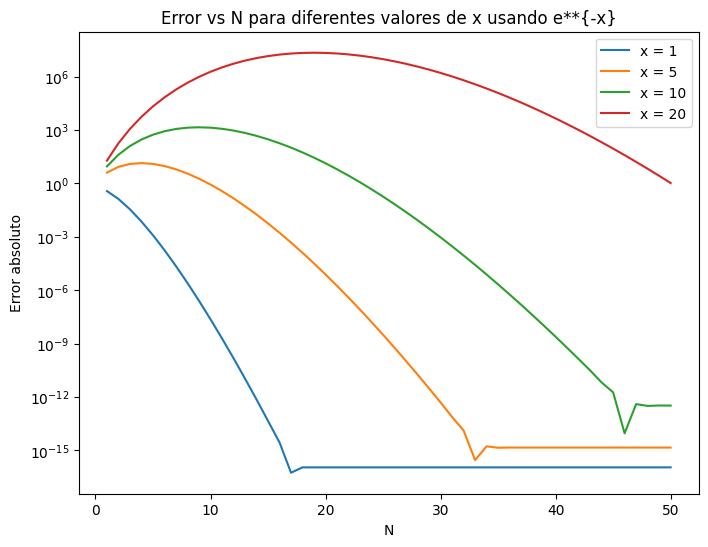

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def exp_aprox(x, N):

    #Calcula la aproximacion de e^{-x} usando N terminos de la serie

    suma = 0.0
    for i in range(N+1):
        termino = ((-1)**i) * (x**i) / math.factorial(i)
        suma += termino
    return suma

# valores de x para probar
valores_x = [1, 5, 10, 20]
N_max = 50

plt.figure(figsize=(8,6))
for x in valores_x:
    errores = []           # lista para guardar los errores
    Ns = range(1, N_max+1) # cantidad de terminos usados

    for N in Ns:
        aproximado = exp_aprox(x, N) # calcular la aproximacion con N terminos

        # valor real con numpy
        real = np.exp(-x)

        # calcular el error absoluto
        error = abs(aproximado - real)

        # guardar el error en la lista
        errores.append(error)

    plt.plot(Ns, errores, label=f"x = {x}")

plt.yscale("log")  # escala logaritmica
plt.xlabel("N")
plt.ylabel("Error absoluto")
plt.title("Error vs N para diferentes valores de x usando e**{-x}")
plt.legend()
plt.show()


# 4.
Write a program to compute the absolute and relative errors in Stirling's approximation

$$
n! \approx \sqrt{2\pi n} \, (n/e)^n
$$

for $n = 1, \ldots, 10 $. Does the absolute error grow or shrink as $n$ increases? Does the relative error grow or shrink as $n$ increases?

In [ ]:

def stirling(n):
    return math.sqrt(2 * math.pi * n) * (n / math.e) ** n

for n in range(1, 11):
    real = math.factorial(n)         # factorial real de n
    approx = stirling(n)             # aproximacion de Stirling

    abs_error = abs(real - approx)   # error absoluto
    rel_error = abs_error / real     # error relativo

    # Imprimir resultados
    print(f"n = {n}")
    print(f"Factorial real     = {real}")
    print(f"Aproximacion Stirling = {approx}")
    print(f"Error absoluto     = {abs_error}")
    print(f"Error relativo     = {rel_error}")
    print("-" * 30)


n = 1
Factorial real     = 1
Aproximacion Stirling = 0.9221370088957891
Error absoluto     = 0.07786299110421091
Error relativo     = 0.07786299110421091
------------------------------
n = 2
Factorial real     = 2
Aproximacion Stirling = 1.9190043514889832
Error absoluto     = 0.08099564851101682
Error relativo     = 0.04049782425550841
------------------------------
n = 3
Factorial real     = 6
Aproximacion Stirling = 5.836209591345864
Error absoluto     = 0.16379040865413597
Error relativo     = 0.027298401442355995
------------------------------
n = 4
Factorial real     = 24
Aproximacion Stirling = 23.506175132893294
Error absoluto     = 0.4938248671067065
Error relativo     = 0.020576036129446102
------------------------------
n = 5
Factorial real     = 120
Aproximacion Stirling = 118.0191679575901
Error absoluto     = 1.9808320424099009
Error relativo     = 0.016506933686749173
------------------------------
n = 6
Factorial real     = 720
Aproximacion Stirling = 710.078184642185
E

Cuando usamos la formula de Stirling para aproximar el factorial, me di cuenta de que:

El error absoluto (o sea, la diferencia entre el valor real y el aproximado) se hace mas grande cuando n aunmenta porque los factoriales crecen muy rapido y entonces la diferencia tambien.

Pero el error relativo (o sea, cuan grande es el error comparado con el resultado real) se hace mas pequeño a medida que
n crece. Esto quiere decir que, aunque el error es mas grande en numeros grandes, ese error importa menos en comparacion con el numero total.

Entonces, la formula de Stirling no es tan buena para numeros pequeños como 1, 2 o 3, pero sirve muy bien para numeros grandes. Aunque no te da el resultado exacto, te da un valor muy cercano, lo cual es util cuando no necesitas tanta precision o cuando calcular el factorial real es muy complicado.

# 5.
Consider a quadratic equation $ ax^2 + bx + c = 0 $ that has real solutions.

- Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ ax^2 + bx + c = 0 $ using the standard formula  
    $$
    x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.
    $$

    Use your program to compute the solutions of $ 0.001x^2 + 1000x + 0.001 = 0 $.

- There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, the solutions can also be written as  
    $$
    x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}.
    $$

    Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $ 0.001x^2 + 1000x + 0.001 = 0 $. What do you see? How do you explain it?

- Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

In [ ]:
############VALOR

import numpy as np

a, b, c = 0.001, 1000, 0.001
raices = np.roots([a, b, c])
print(raices)


[-1.e+06 -1.e-06]


In [ ]:
def cuadratica(a,b,c):
  x=(-b+((b**2)-(4*a*c))**0.5)/(2*a)
  y=(-b-((b**2)-(4*a*c))**0.5)/(2*a)
  return x,y


In [ ]:
cuadratica(0.001,1000,0.001)

(-9.999894245993346e-07, -999999.999999)

Podemos observar que el resultado de y se aproxima bastante al valor real, a diferencia del resultado de x que da un valor incorrecto, deberia acercarse a 0 por la izquierda


In [ ]:
def cuadratica2(a,b,c):
  x = (2*c)/(-b + ((b**2 - 4*a*c)**0.5))
  y = (2*c)/(-b - ((b**2 - 4*a*c)**0.5))
  return x, y


In [ ]:
cuadratica2(0.001,1000,0.001)

(-1000010.5755125057, -1.000000000001e-06)

aca tenemos el mismo caso pero al reves, el termino x da un valor muy alejado al real en cambio el temrino y se aproxima bastante al esperado

El contraste entre las raíces tan grandes y tan pequeñas es justamente lo que causa el problema de pérdida de precisión. La pérdida de precisión ocurre cuando en la fórmula cuadrática restas dos números muy grandes y casi iguales; la computadora pierde los decimales pequeños que marcan la diferencia.

In [ ]:
import numpy as np

def cuadratica_precisa(a, b, c):
    # calculamos el discriminante
    d = b**2 - 4*a*c
    raiz_d = np.sqrt(d)

    # si b es positivo usamos una forma
    # si b es negativo usamos la otra
    if b > 0:
        x1 = (-b - raiz_d) / (2*a)
    else:
        x1 = (-b + raiz_d) / (2*a)

    # usamos la relacion x1 * x2 = c / a para sacar la segunda raiz
    x2 = c / (a * x1)

    return x1, x2


# probamos el programa con los valores
a = 0.001
b = 1000
c = 0.001

r1, r2 = cuadratica_precisa(a, b, c)

print("Raiz 1:", r1)
print("Raiz 2:", r2)

# ahora comparamos con la funcion de numpy que hace lo mismo
raices_numpy = np.roots([a, b, c])
print("Raices con numpy:", raices_numpy)


Raiz 1: -999999.999999
Raiz 2: -1.000000000001e-06
Raices con numpy: [-1.e+06 -1.e-06]


-999999.999999 ≈ -1.0 × e6

-1.000000000001e-06 ≈ -0.000001

las dos coinciden con las raices que devuelve numpy, solo cambian en las ultimas cifras decimales